<a href="https://colab.research.google.com/github/Nhat-Thanh/CS114.L21/blob/main/Bai_Tap_Colab/Lan1/Recognizing_hand_written_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1> <b> CS114.L21: MACHINE LEARNING <center> <h1> <b>

<center> <h2> <b> BÀI TẬP COLAB SỐ 01: NHẬN DẠNG CHỮ SỐ VIẾT TAY ĐƯỢC CHỤP BẰNG WEBCAME (Ngày 12/4/2021) <center> <h> <b>

###**1. Nhóm thực hiện**

* 19522246 - Vũ Nguyễn Nhật Thanh
* 19522180 - Trương Thế Tấn
* 19521551 - Nông Thanh Hồng

###**2. Yêu cầu đề bài:**

1. **Yêu cầu code**: tạo một notebook colab với các đoạn code và chú thích cần thiết để thực hiện công việc sau:

  * Train model cho bài toán hand-written digits recognition theo example của sklearn: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
  * Truy cập webcam của máy tính từ colab.
  * Chụp ảnh một tờ giấy đang được giơ ra trước webcam
  * Nhận dạng xem chữ số đang viết trên tờ giấy là số mấy.

2. **Yêu cầu phân tích**: Thông qua thực nghiệm chạy thử nhiều lần trả lời các câu hỏi sau

  * Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?
  * Ủa mà nhìn vào đâu để kết luận là tốt hay không?
  * Nếu không tốt thì lý do tại sao?
  * Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?

###**3. Reference**

* Data & Training: [Recognizing hand-written digits](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py)
* Xử lý ảnh: [Xử lý ảnh với OpenCV - Tut 2: Chuyển đổi ảnh màu](https://blog.vietnamlab.vn/xu-ly-anh-voi-opencv-tut-2-chuyen-doi-anh-mau/)
* Capture camera: [Google Colab](https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=7EDBBkAz2USP)


###**4. Source code**




####**4.1. Import library**

In [21]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import numpy as np
import cv2

#### **4.2. Digits dataset**

Tập dữ liệu là ảnh thang màu xám với độ phân giải 8x8 pixel.



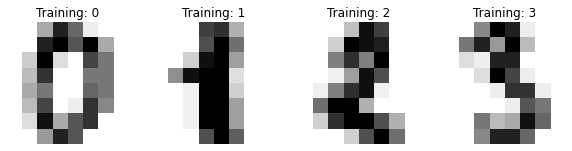

In [22]:
digits = datasets.load_digits()
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

#### **4.3. Classification**

Để áp dụng bộ phân loại trên dữ liệu của Sklearn, chúng ta cần làm phẳng các hình ảnh, chuyển từng mảng 2-D các giá trị thang độ xám từ hình dạng (8, 8) thành hình dạng (64,). Sau đó, toàn bộ tập dữ liệu sẽ có hình dạng (n_samples, n_features), trong đó n_samples là số lượng hình ảnh và n_features là tổng số pixel trong mỗi hình ảnh.

Chia dữ liệu thành các tập con huấn luyện và thử nghiệm 



In [23]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)
# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)
# print(X_test[40])

Hiển thị 4 dự đoán mẫu



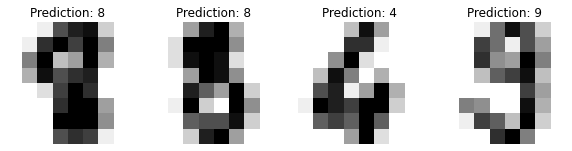

In [24]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [25]:
print("Classification report for classifier {0}:\n".format(clf),
      "{0}\n".format(metrics.classification_report(y_test, predicted)))

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted 

:func:`~sklearn.metrics.classification_report` builds a text report showing
the main classification metrics.



We can also plot a `confusion matrix <confusion_matrix>` of the
true digit values and the predicted digit values.



Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


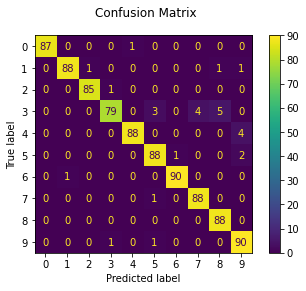

In [26]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n{}".format(disp.confusion_matrix))
plt.show()

####**4.4. Hàm chụp ảnh từ webcam (Google Colab)**
Source: [Google Colab](https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=7EDBBkAz2USP)

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

####**4.5. Chụp ảnh các mẫu để kiểm thử**
- Chụp ảnh các chữ số.
- Mỗi chữ số, ta chụp 11 bức để kết luận có độ chính xác cao hơn
- Ở đây ta chỉ tạo testcase với 4 chữ số là 3, 6, 7, 9
- Có thể uncomment để tạo được nhiều testcase hơn

In [ ]:
from IPython.display import Image
def create_testcase(digit):
    i = 0
    while i < 11:
      try:
        name = "so{0}_{1}.jpg".format(digit, i)
        filename = take_photo(filename=name)
        print('Saved to {}'.format(filename))
        # Show the image which was just taken.
        display(Image(filename))
      except Exception as err:
        # Errors will be thrown if the user does not have a webcam or if they do not
        # grant the page permission to access it.
        print(str(err))
      i += 1
      
# testcase for digits 1, 2, 4, 5, 8
# create_testcase(1)
# create_testcase(2)
# create_testcase(4)
# create_testcase(5)
# create_testcase(8)

#testcase for digit 3
create_testcase(3)

# testcase for digit 6
create_testcase(6)

# testcase for digit 7
create_testcase(7)

# testcase for digit 9
create_testcase(9)


#### **4.6. Kiểm thử mô hình với các testcase vừa tạo**
Link testcase mẫu: [Tại đây](https://github.com/Nhat-Thanh/CS114.L21/blob/main/Bai_Tap_Colab/Lan1/testcase_nhan_dien_chu_so.zip)

Có thể chạy lệnh sau để lấy được testcase đã được chụp trước, bộ testcase chứa hình ảnh của các chữ số 3,7,6,9 với tổng 44 bức ảnh.


In [38]:
# get and unzip sample test case
!wget -O testcase.zip "https://github.com/Nhat-Thanh/CS114.L21/raw/main/Bai_Tap_Colab/Lan1/testcase_nhan_dien_chu_so.zip"
!unzip testcase.zip

--2021-04-19 07:31:48--  https://github.com/Nhat-Thanh/CS114.L21/raw/main/Bai_Tap_Colab/Lan1/testcase_nhan_dien_chu_so.zip
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Nhat-Thanh/CS114.L21/main/Bai_Tap_Colab/Lan1/testcase_nhan_dien_chu_so.zip [following]
--2021-04-19 07:31:48--  https://raw.githubusercontent.com/Nhat-Thanh/CS114.L21/main/Bai_Tap_Colab/Lan1/testcase_nhan_dien_chu_so.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824876 (806K) [application/zip]
Saving to: ‘testcase.zip’

testcase.zip        100%[===================>] 805.54K  --.-KB/s    in 0.06s   

2021-04-19 07:31:48 (1

Sau khi tải và giải nén testcase thì ta tiến hành chạy thử nghiệm trên toàn bộ các ảnh của testcase

Digit: 3


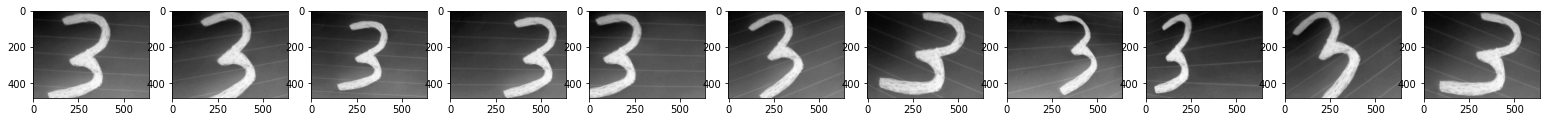

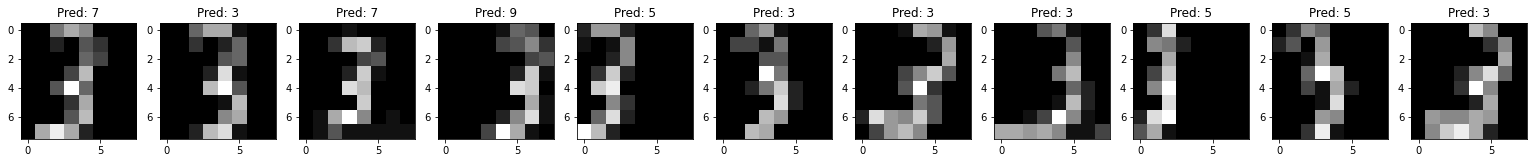

accuracy: [0.45454545]

Digit: 6


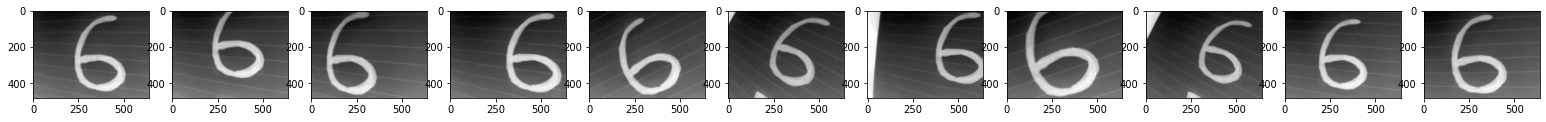

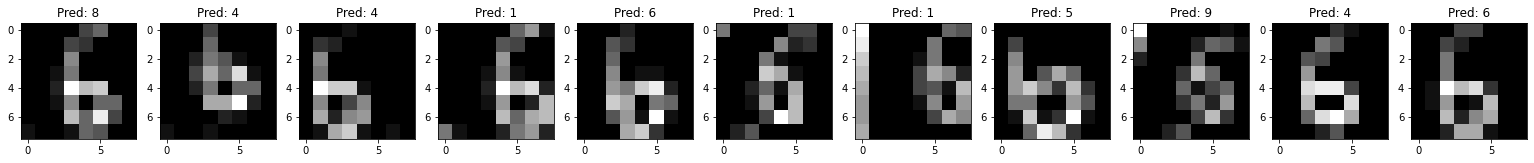

accuracy: [0.18181818]

Digit: 7


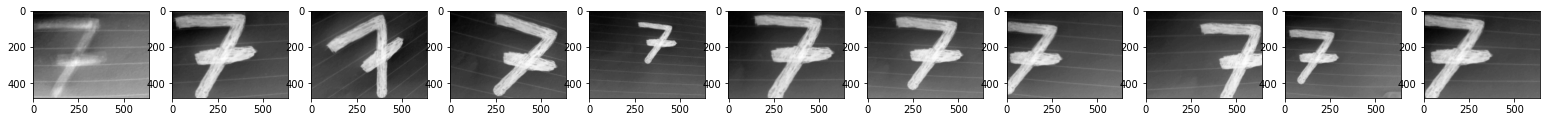

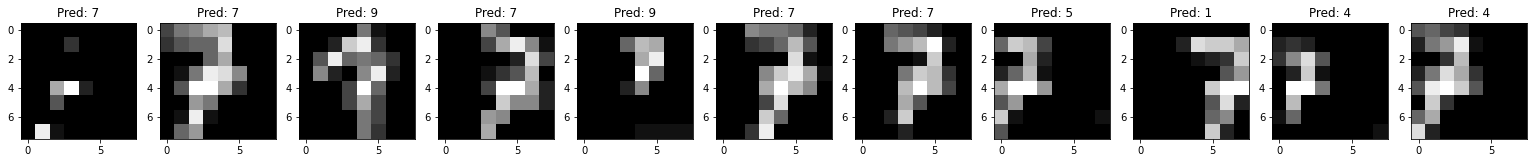

accuracy: [0.45454545]

Digit: 9


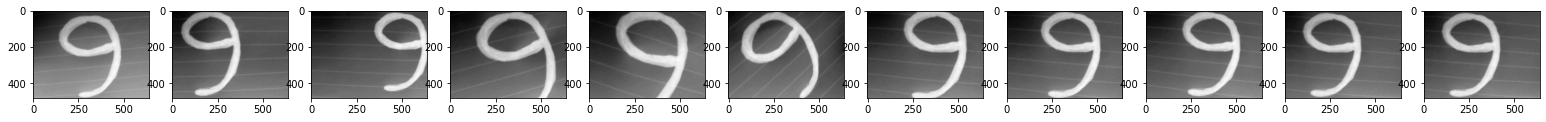

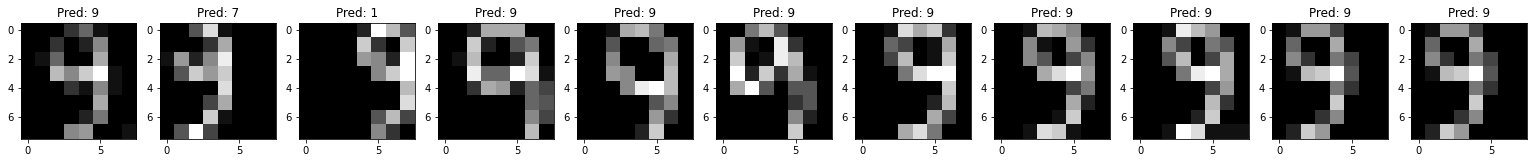

accuracy: [0.81818182]



In [37]:
# preprocess the image which captured by laptop's webcam
def preprocess(image):
    # convert RGB image to gray image
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # blur image
    image_blur = cv2.GaussianBlur(image_gray, (5, 5), 0.1)
    # reverse color of all blur_image's pixels
    result_image = 255 - image_blur[:, :]
    return result_image
# end preprocessing

# predict digit and show the result
def predict_and_show(digit):
    print("Digit:", digit)
    # save a list of input images that have the same digit
    input = []
    i = 0
    while i < 11:
      image_path = "so{0}_{1}.jpg".format(digit, i)
      inputImage = cv2.imread(image_path)
      inputImage = preprocess(inputImage)
      input.append(inputImage)
      i += 1
    # end saving

    # show the image list that saved in above part
    fig_input, axs = plt.subplots(1, 11, figsize=(27,27))
    i = 0
    while i < 11:
      axs[i].imshow(input[i], 'gray')
      i += 1
    plt.show()
    # end showing the image list

    # save a list of number that prepresent the predicted digit for the ith input image
    output = [] # array which used to save predicted digits
    i = 0
    while i < 11:
      ret, input[i] = cv2.threshold(input[i], 160, 255, cv2.THRESH_BINARY)
      # resize the shape of the ith input image to 8x8
      input[i] = cv2.resize(input[i], (8, 8), interpolation = cv2.INTER_AREA)
      # normalize the value of each pixel in range 0 to 15
      input[i] = cv2.normalize(input[i], None, 0, 15, cv2.NORM_MINMAX)
      # save predicted digit to output array
      output.append(clf.predict(input[i].reshape(1, 64)))
      i += 1
    # end saving

    # show the output list that save in above part and corresponding input images
    fig_output, axs_output = plt.subplots(1, 11, figsize=(27,27))
    i = 0
    while i < 11:
      axs_output[i].title.set_text("Pred: {0}".format(int(output[i])))
      axs_output[i].imshow(input[i], 'gray')
      i += 1
    plt.show()
    # show the true prediction probability 
    i, probability = 0, 0
    while i < 11:
        probability += (output[i] == digit)
        i += 1
    print("accuracy: {0}\n".format(probability / 11))
    # end showing the output
# end define funcion

predict_and_show(3)
predict_and_show(6)
predict_and_show(7)
predict_and_show(9)

###**5. Kết luận**

1. ***Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?***
- Mô hinh khi chạy thực tế với webcam của laptop và giấy viết tay cho lại kết quả không tốt, thậm chí là tệ.

2. ***Ủa mà nhìn vào đâu để kết luận là tốt hay không?***
- Từ kết quả chạy thực nghiệm với các test case khác nhau nhưng cùng một chữ số
	+ Số 3: đúng 5/11 -> accuracy: 0.45%
	+ Số 6: đúng 2/11 -> accuracy: 0.18%
	+ Số 7: đúng 5/11 -> accuracy: 0.45%
	+ Số 9: đúng 9/11 -> accuracy: 0.81%

- nếu xét trên toàn bộ 44 bức ảnh của toàn bộ các testcase thì mô hình chỉ đoán đúng được 21/44 (0.48%), kết quả này khá thấp do số bức ảnh dự đoán đúng chưa được một nửa trên tổng số bức ảnh.

3. ***Nếu không tốt thì lý do tại sao?***

* Do data train của sklearn có điều kiện khá lý tưởng, chữ số có màu đen và nền xung quanh có màu trắng, các chữ số được đặt ở trung tâm và to khớp với viền bức ảnh nên không cần phải qua bước xử lý để cắt được khung hình chứa số, ảnh không có sự ảnh hưởng của các tác nhân bên ngoài khi so với ảnh chụp thực tế.
* Data của Sklearn gồm những ảnh có độ phân giải 8x8 pixel, một mức phân giải khá thấp nếu so với một tấm ảnh chụp bằng camera, nên dẫn đến chuyển từ ảnh chụp sang ảnh 8x8 pixel đã làm giảm khả năng nhận diện của model khá nhiều.
* Việc tiền xử lý ảnh của data train rất tốt, trong khi đó việc xử lý ảnh chụp lại không được như ý muốn nên model nhận diện không tốt.
* Chất lượng ở camera laptop, tùy vào từng dòng máy có chất lượng camera khác nhau, cộng với việc điều kiện, môi trường xung quanh khi chụp sẽ làm cho màu sắc của ảnh không được đồng đều, làm ảnh hưởng đến quá trình tiền xử lý ảnh chụp.
* Do việc viết số chưa rõ, nghiêng, nhỏ nên cũng đã ảnh hưởng tới việc nhận dạng.

4. ***Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?***
- Nếu kết quả của mô hình này tốt thì ta có thể áp dụng nó vô các mô hình phức tạp hơn, bằng việc tìm và cắt các khung hình chứa chữ số và kết hợp thêm một số bước tiền xử lý dữ liệu, sau đó đưa từng khung hình đã qua xử lý đó vào mô hình để nhận diện chữ số, sau đó ghép kết quả của từng khung hình lại ta sẽ có được kết quả cuối cùng.
- Theo như thực nghiệm đơn giản mà nhóm em làm ở trên thì rất khó để dùng model này vào các bài toán phức tạp khác vì kết quả không mấy khả quan.
- Nếu muốn kết quả tốt trong thực tế thì theo nhóm em thấy là phải qua nhiều công đoạn tiền xử lý dữ liệu khá phức tạp để đầu vào model các bức ảnh theo đúng như định dạng như khi huấn luyện model. Từ đó yêu cầu về khâu tiền xử lý tăng cao trong khi kết quả chưa chắc đã tốt như yêu cầu.